 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [12]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import os
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [13]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns_df = pd.read_csv(whale_returns_csv, index_col = 'Date', infer_datetime_format = True, parse_dates = True).sort_index()
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [14]:
# Count nulls
# YOUR CODE HERE
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [15]:
# Drop nulls
# YOUR CODE HERE
whale_returns_df = whale_returns_df.dropna()

whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [16]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv, index_col = 'Date', infer_datetime_format = True, parse_dates = True).sort_index()
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [17]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [18]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()

algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [19]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv, index_col = 'Date', infer_datetime_format = True, parse_dates = True).sort_index()
sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [20]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [21]:
# Fix Data Types
sp500_history_df['Close'] = sp500_history_df['Close'].apply(lambda x: x.split('$')[1])
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')

In [22]:
# Calculate Daily Returns
sp500_returns_df = sp500_history_df.pct_change()
sp500_returns_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [23]:
# Drop nulls
sp500_returns_df = sp500_returns_df.dropna()

In [24]:
# Rename Column
sp500_returns_df = sp500_returns_df.rename(columns = {'Close' : 'S&P 500'})
sp500_returns_df.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [25]:
# Concatenate all DataFrames into a single DataFrame
daily_returns_df = pd.concat([whale_returns_df, algo_returns_df, sp500_returns_df], axis = 1, join = 'inner')
daily_returns_df = daily_returns_df.sort_index(ascending = True)
daily_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

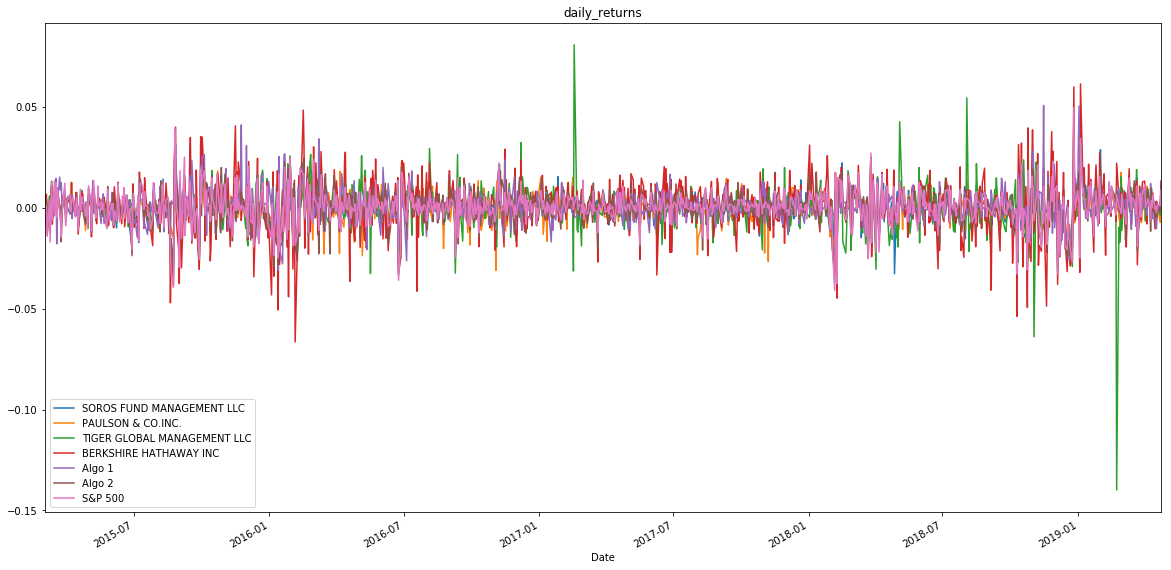

In [26]:
# Plot daily returns
daily_returns_plot = daily_returns_df.plot(figsize = (20,10), title = 'daily_returns')

In [27]:
cumulative_returns_df = (1 + daily_returns_df).cumprod()
cumulative_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.995461
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.991093
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.992278
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.978214
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.982072


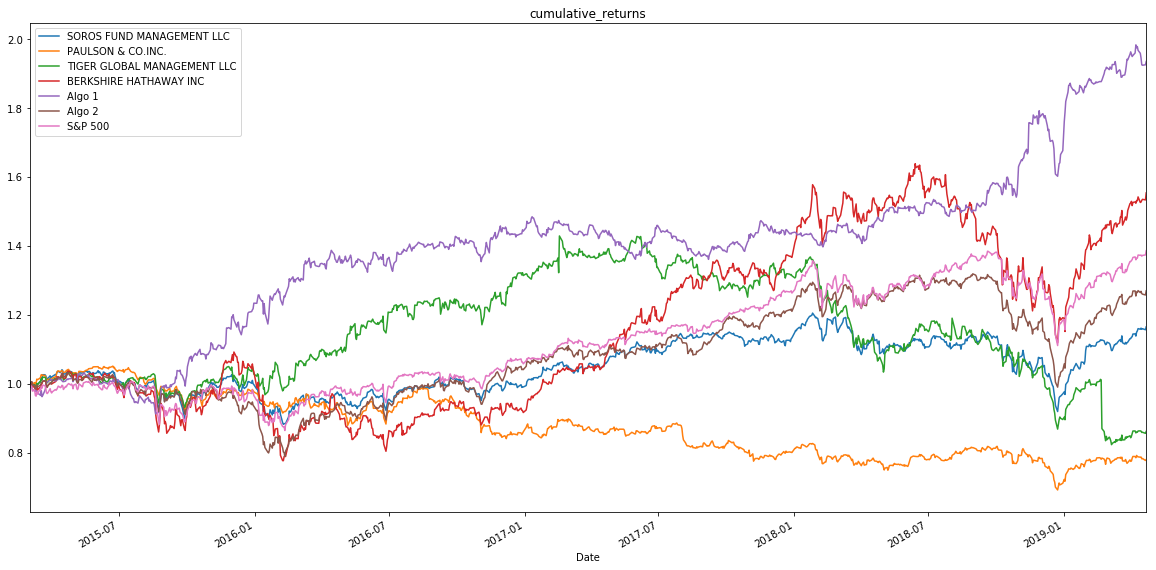

In [28]:
# Plot cumulative returns
cumulative_returns_plot = cumulative_returns_df.plot(figsize = (20,10), title = 'cumulative_returns')

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

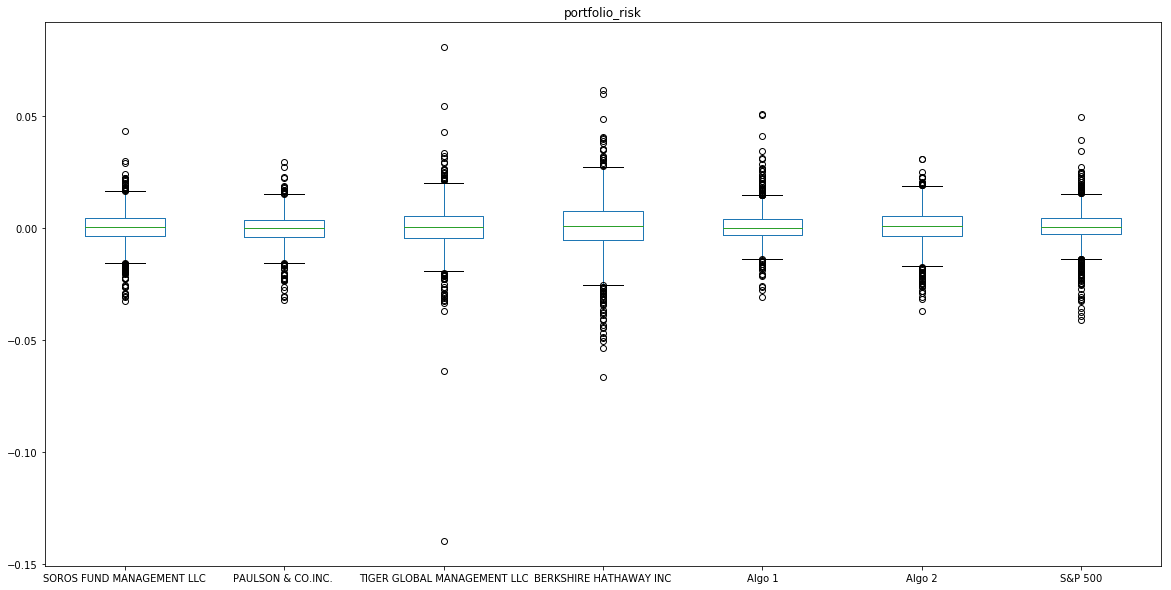

In [29]:
# Box plot to visually show risk
daily_returns_boxplot = daily_returns_df.plot(kind = 'box', figsize = (20, 10), title = 'portfolio_risk')

In [30]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
vol_df = pd.DataFrame(daily_returns_df.std(), columns= ['vol'])
vol_df

,vol
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
S&P 500,0.008554


In [31]:
# Determine which portfolios are riskier than the S&P 500
sp500_vol = vol_df.loc['S&P 500']
vol_df['riskier_than_s&p'] = np.where(vol_df > sp500_vol, True, False)
vol_df

,vol,riskier_than_s&p
SOROS FUND MANAGEMENT LLC,0.007895,False
PAULSON & CO.INC.,0.007023,False
TIGER GLOBAL MANAGEMENT LLC,0.010894,True
BERKSHIRE HATHAWAY INC,0.012919,True
Algo 1,0.007620,False
Algo 2,0.008342,False
S&P 500,0.008554,False


In [32]:
# Calculate the annualized standard deviation (252 trading days)
vol_df['vol_annualized'] = vol_df['vol'] * np.sqrt(252)
vol_df = vol_df[['vol', 'vol_annualized', 'riskier_than_s&p']]
vol_df

,vol,vol_annualized,riskier_than_s&p
SOROS FUND MANAGEMENT LLC,0.007895,0.125335,False
PAULSON & CO.INC.,0.007023,0.111488,False
TIGER GLOBAL MANAGEMENT LLC,0.010894,0.172936,True
BERKSHIRE HATHAWAY INC,0.012919,0.205077,True
Algo 1,0.007620,0.120967,False
Algo 2,0.008342,0.132430,False
S&P 500,0.008554,0.135786,False


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

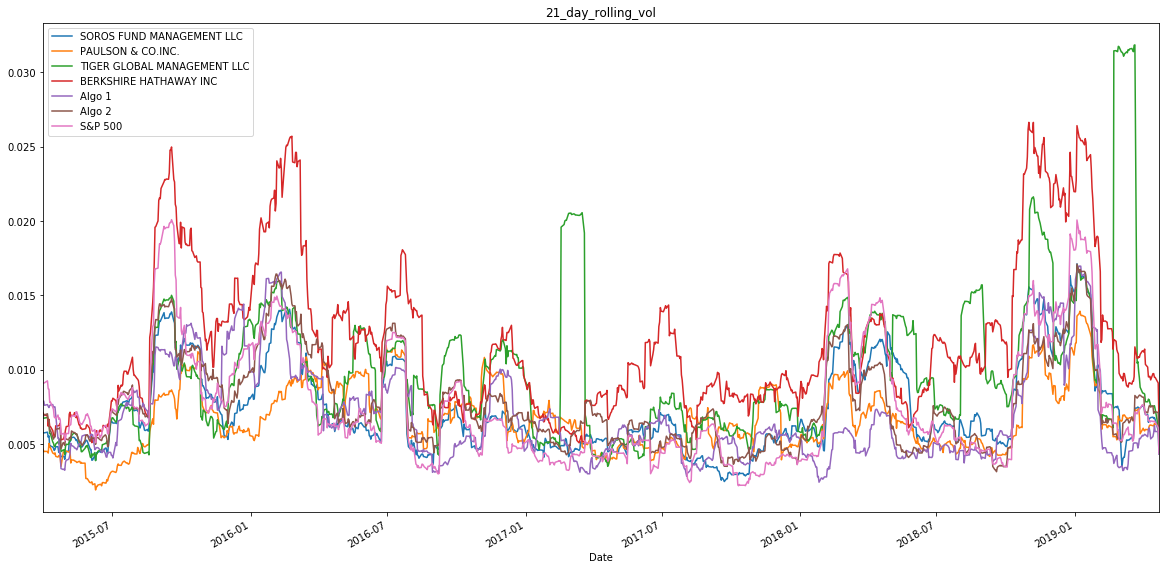

In [33]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
rolling_vol_df = daily_returns_df.rolling(window = 21).std().dropna()
rolling_vol_plot = rolling_vol_df.plot(figsize = (20,10), title = '21_day_rolling_vol')

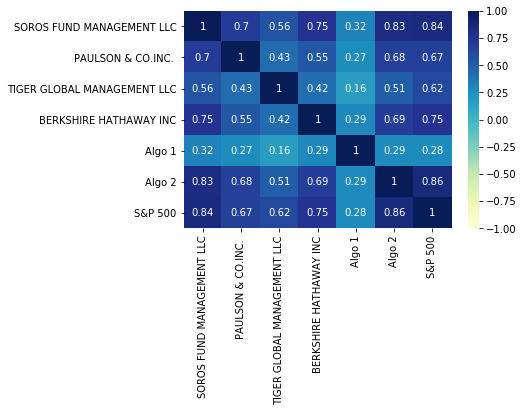

In [34]:
# Construct a correlation table
corr_df = daily_returns_df.corr()
corr_heatmap = sns.heatmap(corr_df, annot = True, vmin = -1, vmax = 1, cmap = 'YlGnBu')

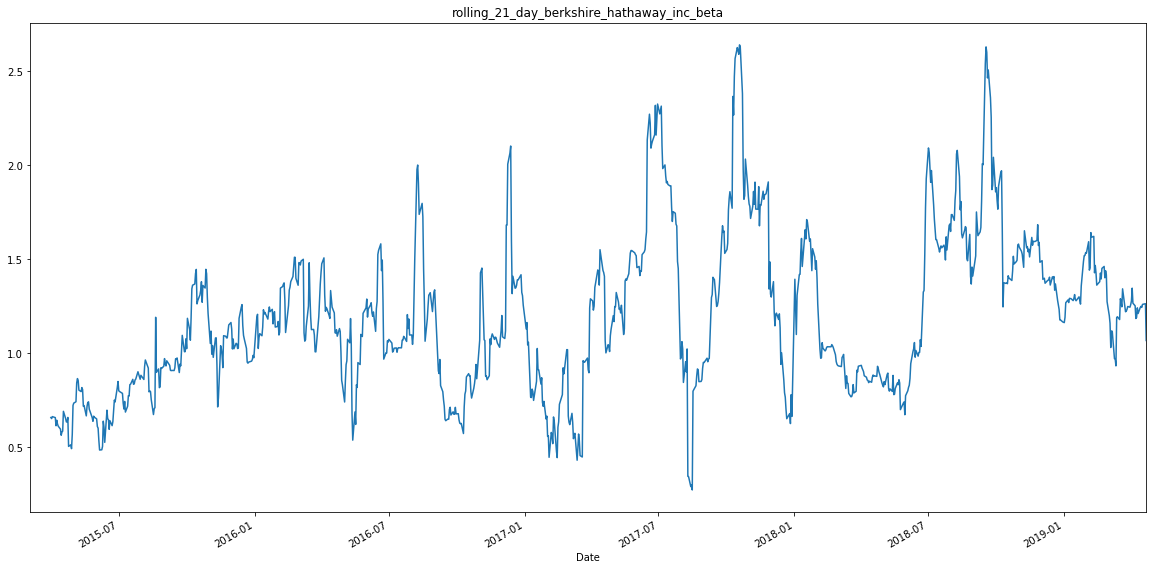

In [35]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
rolling_brk_cov = daily_returns_df['BERKSHIRE HATHAWAY INC'].rolling(window = 21).cov(daily_returns_df['S&P 500'])

rolling_mkt_var = daily_returns_df['S&P 500'].rolling(window = 21).var()

rolling_brk_beta = rolling_brk_cov/ rolling_mkt_var

rolling_brk_bet_plot = rolling_brk_beta.plot(figsize = (20,10), title = 'rolling_21_day_berkshire_hathaway_inc_beta')

In [61]:
ewm_returns_df = daily_returns_df.ewm(span = 21, adjust = False).mean()

ewm_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,-0.000948,-0.004233,-0.000681,-0.005589,-0.002546,-0.000644,-0.004525
2015-03-05,-0.000496,-0.003478,-0.000405,-0.004469,-0.002402,-0.000192,-0.004005
2015-03-06,-0.001170,-0.003486,-0.001139,-0.005253,-0.002634,-0.001216,-0.004929
2015-03-09,-0.001011,-0.002785,-0.000504,-0.004926,-0.002890,-0.000987,-0.004123


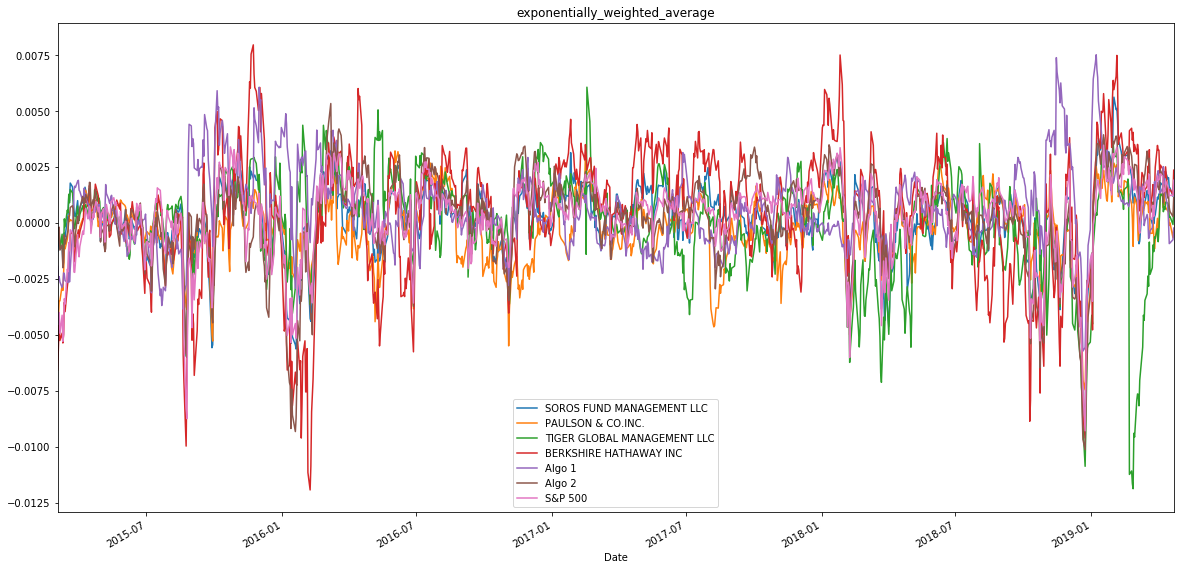

In [70]:
# # Calculate a rolling window using the exponentially weighted moving average. 
ewm_plot = ewm_returns_df.plot(figsize = (20,10), title = 'exponentially_weighted_average')

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [64]:
# Calculate annualized Sharpe Ratios
sharpe_df = daily_returns_df.mean() * 252 / (daily_returns_df.std() * np.sqrt(252))

sharpe_df

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

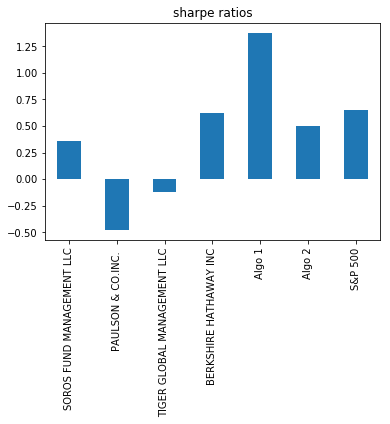

In [66]:
# Visualize the sharpe ratios as a bar plot
sharpe_plot = sharpe_df.plot(kind = 'bar', title = 'sharpe ratios')

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

only algo 1 outperforms the market and whales.

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [7]:
# Read the first stock
goog_csv = Path("Resources/goog_historical.csv")
# YOUR CODE HERE
goog_df = pd.read_csv(goog_csv, index_col = 'Trade DATE', infer_datetime_format = True, parse_dates = True).sort_index()
goog_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [8]:
# Read the second stock
aapl_csv = Path("Resources/aapl_historical.csv")
# YOUR CODE HERE
aapl_df = pd.read_csv(aapl_csv, index_col = 'Trade DATE', infer_datetime_format = True, parse_dates = True).sort_index()
aapl_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [48]:
# Read the third stock
cost_csv = Path("Resources/cost_historical.csv")
# YOUR CODE HERE
cost_df = pd.read_csv(cost_csv, index_col = 'Trade DATE', infer_datetime_format = True, parse_dates = True).sort_index()
cost_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [56]:
# Concatenate all stocks into a single DataFrame
stock_df = pd.concat([goog_df, aapl_df, cost_df])
stock_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [57]:
# Reset the index
# YOUR CODE HERE
stock_df = stock_df.reset_index()

In [58]:
# Pivot so that each column of prices represents a unique symbol
stock_df = stock_df.pivot_table(values = 'NOCP', index = 'Trade DATE', columns = 'Symbol')

print(stock_df.shape)
stock_df.head()

(250, 3)


Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [59]:
# Drop Nulls
stock_df = stock_df.dropna()

print(stock_df.shape)
stock_df.head()

(250, 3)


Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [76]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
stock_returns_df = stock_df.pct_change().dropna()
stock_returns_df = pd.DataFrame(stock_returns_df.dot(weights)).rename(columns = {0 : 'Custom'})
stock_returns_df.head()

,Custom
Trade DATE,
2018-05-14,0.000015
2018-05-15,-0.010064
2018-05-16,0.009403
2018-05-17,-0.001595
2018-05-18,-0.006061


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [89]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
portfolio_df = daily_returns_df.merge(stock_returns_df, how = 'inner', left_index = True, right_index = True)

portfolio_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.011959


In [90]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_df = portfolio_df.dropna()

portfolio_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [91]:
# Risk
# YOUR CODE HERE
portfolio_vol = pd.DataFrame(np.sqrt(portfolio_df.var() * 252), columns= ['vol'])
portfolio_vol

,vol
SOROS FUND MANAGEMENT LLC,0.146675
PAULSON & CO.INC.,0.116732
TIGER GLOBAL MANAGEMENT LLC,0.232531
BERKSHIRE HATHAWAY INC,0.247155
Algo 1,0.133704
Algo 2,0.139556
S&P 500,0.152054
Custom,0.211496


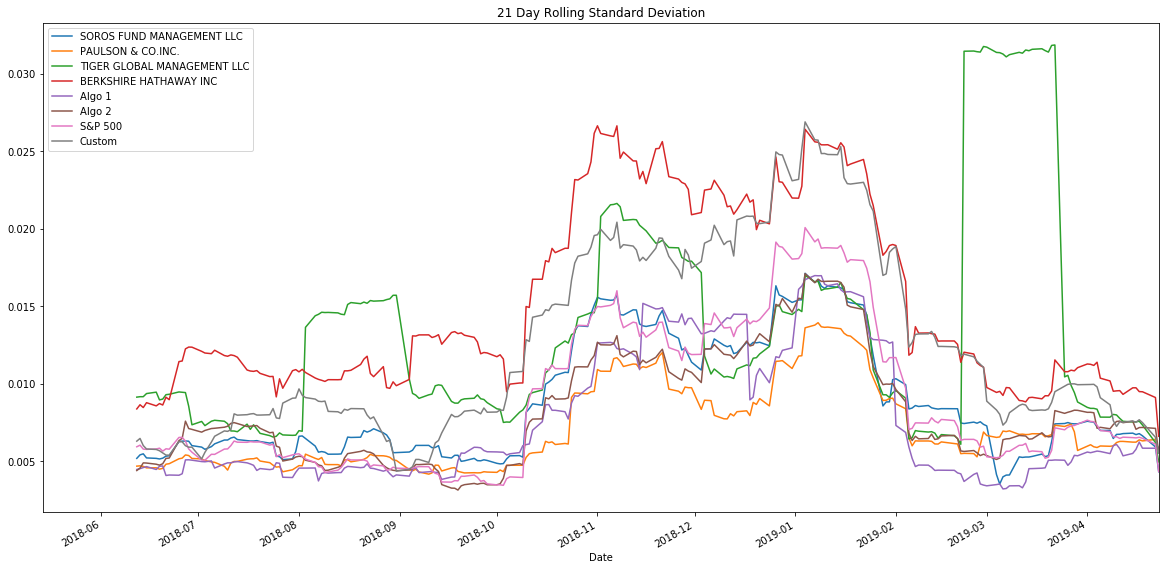

In [39]:
# Rolling
# YOUR CODE HERE
portfolio_plot = portfolio_df.rolling(window = 21).std().plot(figsize = (20,10), title = '21 day rolling volatility')
portfolio_plot

In [95]:
portfolio_sharpe_df = portfolio_df.mean() * 252 / (portfolio_df.std() * np.sqrt(252))
portfolio_sharpe_df

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
Custom                         0.933123
dtype: float64

In [96]:
# Annualized Sharpe Ratios
# YOUR CODE HERE

portfolio_sharpe_df = portfolio_df.mean() * 252 / (portfolio_df.std() * np.sqrt(252))
portfolio_sharpe_df

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
Custom                         0.933123
dtype: float64

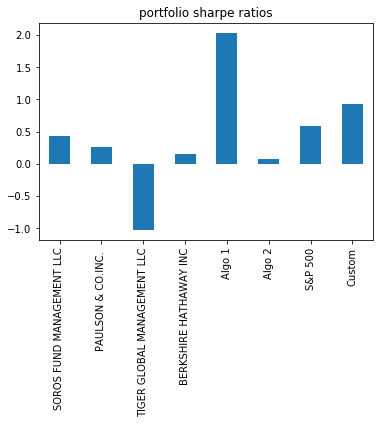

In [97]:
# Visualize the portfolio sharpe ratios as a bar plot
# YOUR CODE HERE
portfolio_sharpe_plot = portfolio_sharpe_df.plot(kind = 'bar', title = 'portfolio sharpe ratios')

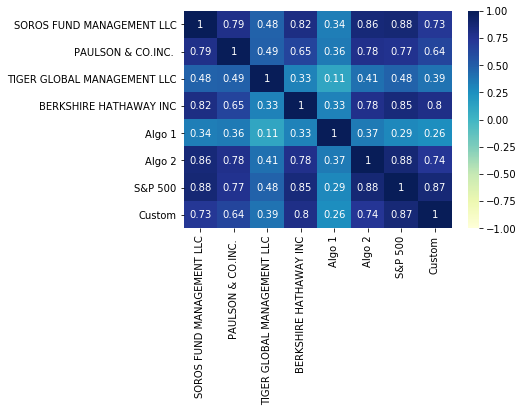

In [99]:
# Create a correlation analysis
# YOUR CODE HERE
portfolio_corr_df = portfolio_df.corr()
portfolio_corr_heatmap = sns.heatmap(portfolio_corr_df, annot = True, vmin = -1, vmax = 1, cmap = 'YlGnBu')

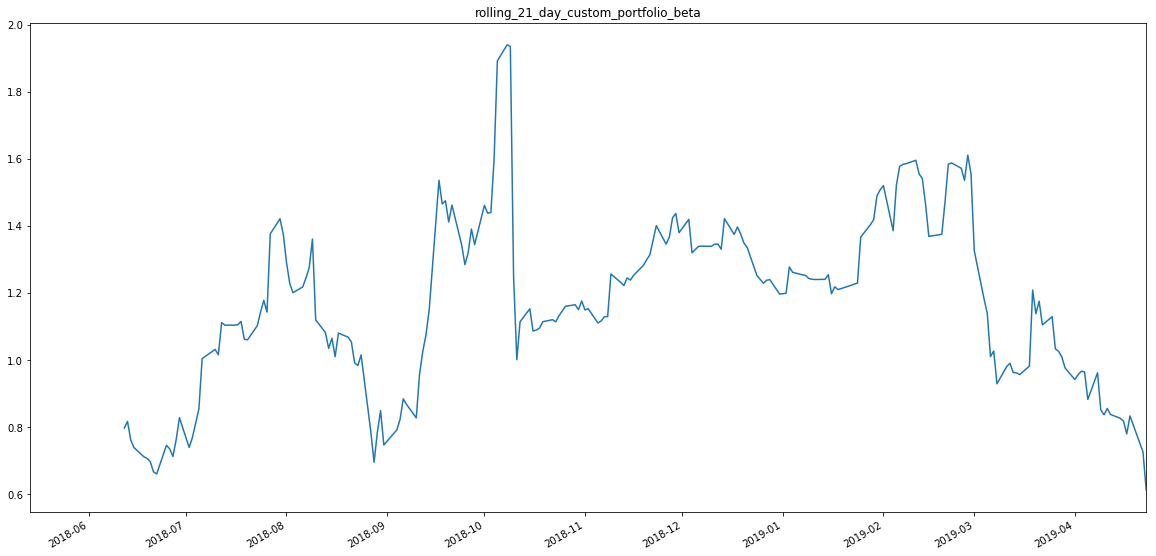

In [101]:
# Beta
# YOUR CODE HERE
portfolio_rolling_brk_cov = portfolio_df['Custom'].rolling(window = 21).cov(portfolio_df['S&P 500'])

portfolio_rolling_mkt_var = portfolio_df['S&P 500'].rolling(window = 21).var()

portfolio_rolling_brk_beta = portfolio_rolling_brk_cov/ portfolio_rolling_mkt_var

portfolio_rolling_brk_bet_plot = portfolio_rolling_brk_beta.plot(figsize = (20,10), title = 'rolling_21_day_custom_portfolio_beta')